In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X,Y=load_planar_dataset()

In [4]:
X.shape

(2, 400)

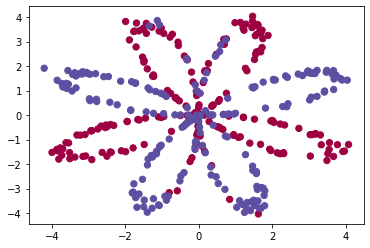

In [5]:
plt.scatter(X[0,:],X[1,:],s=40,c=Y,cmap=plt.cm.Spectral)

In [6]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


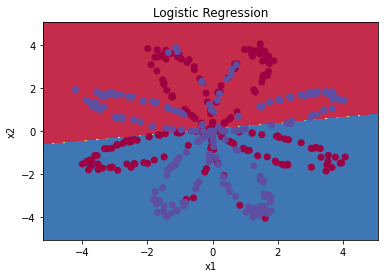

In [7]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [8]:
def layersize(X,Y):
  n_x=X.shape[0]
  n_h=4
  n_y=Y.shape[0]
  return (n_x,n_h,n_y)

In [9]:
def initwb(n_x,n_h,n_y):
  w1=np.random.rand(n_h,n_x)*0.01
  w2=np.random.rand(n_y,n_h)*0.01
  b1=np.zeros(shape=(n_h,1))
  b2=np.zeros(shape=(n_y,1))
  parameters={'w1':w1,'w2':w2,'b1':b1,'b2':b2}
  return parameters

In [10]:
def forwardpropagate(x,parameters):
  w1=parameters['w1']
  w2=parameters['w2']
  b1=parameters['b1']
  b2=parameters['b2']
  z1=np.dot(w1,x)+b1
  a1=np.tanh(z1)
  z2=np.dot(w2,a1)+b2
  a2=sigmoid(z2)
  cache={'z1':z1,'a1':a1,'z2':z2,'a2':a2}
  return a2,cache

In [11]:
def computecost(a2,y,parameters):
  m=y.shape[1]
  cost=(-1/m)*np.sum((1-y)*np.log(1-a2)+y*np.log(a2))
  return cost

In [12]:
def backwardpropagate(parameters,cache,x,y):
  m=x.shape[1]
  w1=parameters['w1']
  w2=parameters['w2']
  a1=cache['a1']
  a2=cache['a2']
  dz2=a2-y
  dw2=(1/m)*np.dot(dz2,a1.T)
  db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
  dz1 = np.multiply(np.dot(w2.T,dz2),1-np.power(a1,2))
  dw1 = 1/m*(np.dot(dz1,x.T))
  db1 = 1/m*(np.sum(dz1,axis=1,keepdims=True))
  grads = {"dw1": dw1,"db1": db1,"dw2": dw2,"db2": db2}
  return grads

In [13]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = grads['dw1']
    db1 = grads['db1']
    dw2 = grads['dw2']
    db2 = grads['db2']

    w1 = w1-learning_rate*dw1
    b1 = b1-learning_rate*db1
    w2 = w2-learning_rate*dw2
    b2 = b2-learning_rate*db2
    
    parameters = {"w1": w1,"b1": b1,"w2": w2,"b2": b2}
    return parameters

In [14]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    n_x = layersize(X, Y)[0]
    n_y = layersize(X, Y)[2]
    parameters = initwb(n_x,n_h,n_y)

    for i in range(0, num_iterations):    
        A2, cache = forwardpropagate(X,parameters)
        cost = computecost(A2,Y,parameters)
        grads = backwardpropagate(parameters,cache,X,Y)
        parameters = update_parameters(parameters,grads)

        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [15]:
def predict(parameters, X):
    A2, cache =  forwardpropagate(X,parameters)
    predictions = A2>0.5
    return predictions

Cost after iteration 0: 0.693170
Cost after iteration 1000: 0.281511
Cost after iteration 2000: 0.269171
Cost after iteration 3000: 0.261978
Cost after iteration 4000: 0.239677
Cost after iteration 5000: 0.225934
Cost after iteration 6000: 0.221542
Cost after iteration 7000: 0.218831
Cost after iteration 8000: 0.216817
Cost after iteration 9000: 0.215201


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

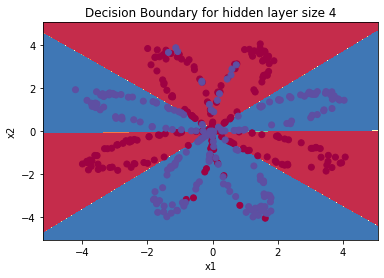

In [16]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))